#### Analysis of a single stock

Goal: Take any number of stocks and run a trendline through 1 year. Assess the theoretical performance of adjusting weekly contributions as compared to contributing a consistent amount every week.

Note: Stocks with less than 1 year of closing history won't work. I don't want to bother with a workaround for now as that doesn't come up much.

This is a strategy thought up by someone who admittedly knows almost nothing about long term stock trading. Determine points in time where the stock is underperforming and opt to buy in. This would only work for stocks you believe will rise in the long term.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
# Arguments     Scenarios                                                                             Example value

# period        date period to download                                     1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
# interval      data interval. If it’s intraday data, the interval needs to be set within 60 days 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# start         If period is not set- Download start date string (YYYY-MM-DD) or datetime             2020-03-18
# end           If period is not set - Download end date string (YYYY-MM-DD) or datetime              2020-03-19
# prepost       Boolean value to include Pre and Post market data                                     Default is False
# auto_adjust   Boolean value to adjust all OHLC                                                      Default is True
# actions       Boolean value download stock dividends and stock splits events                        Default is True

In [3]:
# Master list for use throughout the script

lista = ['AAPL', 'AMD', 'AMZN', 'CRM', 'GOOG', 'INTC', 'MDB', 'MSFT', 'NVDA', 'QQQ', 'SBUX', 'SQ', 'TSLA', 'TSM']

In [4]:
# Pull the closing data
# tickers list needs to match 'lista'

data = yf.download(
        tickers = 'AAPL, AMD, AMZN, CRM, GOOG, INTC, MDB, MSFT, NVDA, QQQ, SBUX, SQ, TSLA, TSM',
        period = '1y',
        #group_by = 'ticker'
    )

df = data['Close']
df = df.dropna() #in case the first row generates as nulls
df

[*********************100%***********************]  14 of 14 completed


,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,SBUX,SQ,TSLA,TSM
Date,,,,,,,,,,,,,,
2020-09-04,120.959999,82.010002,3294.620117,254.699997,1591.040039,50.080002,214.509995,214.250000,126.224998,283.579987,86.269997,146.389999,418.320007,78.910004
2020-09-08,112.820000,78.690002,3149.840088,241.270004,1532.390015,48.910000,210.720001,202.660004,119.129997,269.950012,85.410004,139.110001,330.209991,77.320000
2020-09-09,117.320000,81.910004,3268.610107,250.429993,1556.959961,49.619999,215.580002,211.289993,127.150002,277.880005,85.860001,144.210007,366.279999,79.400002
2020-09-10,113.489998,78.980003,3175.110107,247.800003,1532.020020,48.959999,209.639999,205.369995,123.117500,272.339996,84.879997,141.070007,371.339996,78.900002
2020-09-11,112.000000,76.339996,3116.219971,243.100006,1520.719971,49.279999,207.380005,204.029999,121.644997,270.450012,85.269997,137.449997,372.720001,78.820000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-30,153.119995,111.320000,3421.570068,264.970001,2909.389893,53.939999,396.174988,303.589996,226.880005,380.260010,115.610001,271.920013,730.909973,118.989998
2021-08-31,151.830002,110.720001,3470.790039,265.269989,2909.239990,54.060001,391.829987,301.880005,223.850006,379.950012,117.489998,268.070007,735.719971,119.010002
2021-09-01,152.509995,109.989998,3479.000000,268.320007,2916.840088,53.669998,393.429993,301.829987,224.410004,380.579987,117.449997,268.250000,734.090027,120.459999


In [5]:
# add index to df

df['Index'] = range(1,len(df)+1)
df

,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,SBUX,SQ,TSLA,TSM,Index
Date,,,,,,,,,,,,,,,
2020-09-04,120.959999,82.010002,3294.620117,254.699997,1591.040039,50.080002,214.509995,214.250000,126.224998,283.579987,86.269997,146.389999,418.320007,78.910004,1
2020-09-08,112.820000,78.690002,3149.840088,241.270004,1532.390015,48.910000,210.720001,202.660004,119.129997,269.950012,85.410004,139.110001,330.209991,77.320000,2
2020-09-09,117.320000,81.910004,3268.610107,250.429993,1556.959961,49.619999,215.580002,211.289993,127.150002,277.880005,85.860001,144.210007,366.279999,79.400002,3
2020-09-10,113.489998,78.980003,3175.110107,247.800003,1532.020020,48.959999,209.639999,205.369995,123.117500,272.339996,84.879997,141.070007,371.339996,78.900002,4
2020-09-11,112.000000,76.339996,3116.219971,243.100006,1520.719971,49.279999,207.380005,204.029999,121.644997,270.450012,85.269997,137.449997,372.720001,78.820000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-30,153.119995,111.320000,3421.570068,264.970001,2909.389893,53.939999,396.174988,303.589996,226.880005,380.260010,115.610001,271.920013,730.909973,118.989998,248
2021-08-31,151.830002,110.720001,3470.790039,265.269989,2909.239990,54.060001,391.829987,301.880005,223.850006,379.950012,117.489998,268.070007,735.719971,119.010002,249
2021-09-01,152.509995,109.989998,3479.000000,268.320007,2916.840088,53.669998,393.429993,301.829987,224.410004,380.579987,117.449997,268.250000,734.090027,120.459999,250


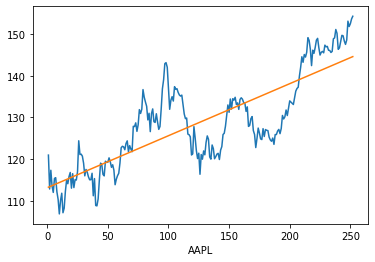

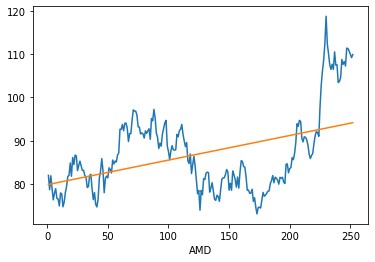

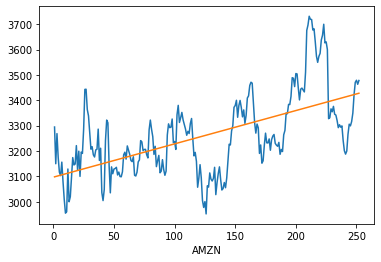

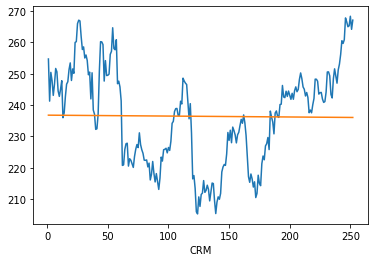

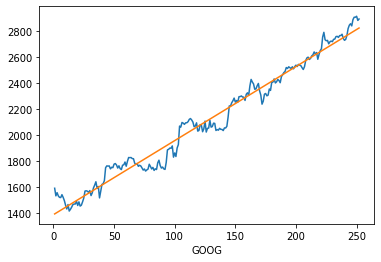

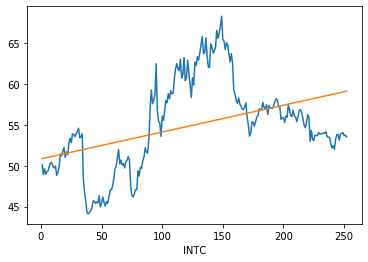

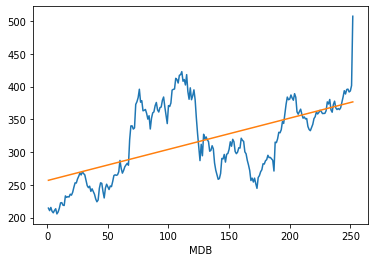

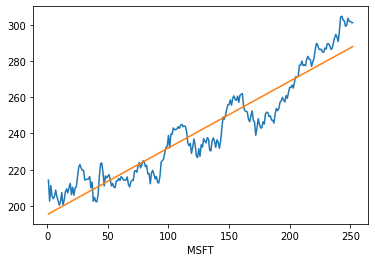

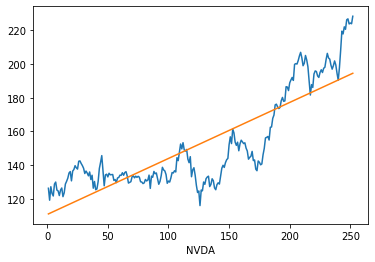

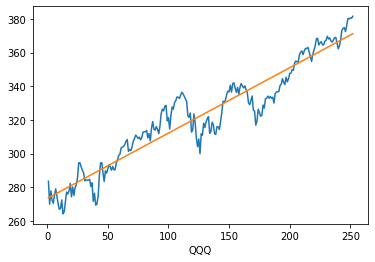

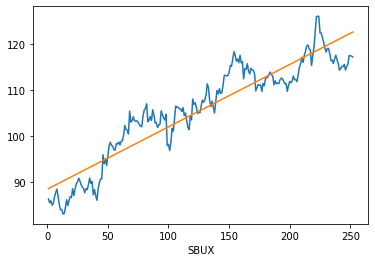

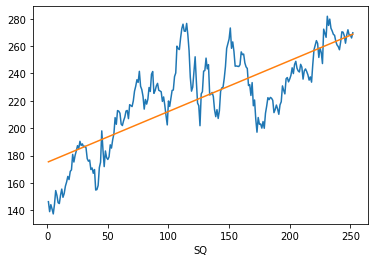

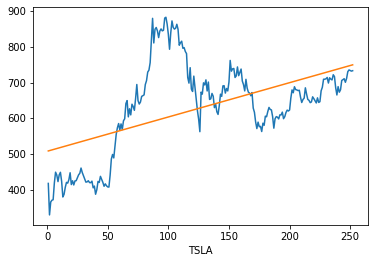

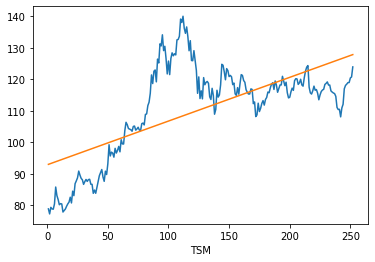

In [6]:
# plot data with trendlines

for i in lista:
    x = df['Index']
    y = df[i]

    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    plt.xlabel(i)
    plt.show()

In [7]:
# create pred and pred/close list

for e in lista:
    nlist = []
    ylist = []
    y = df[str(e)]
    
    for i in range(1,len(df)+1):
        x = df['Index']
        m, b = np.polyfit(x, y, 1)
        d = m*i+b
        nlist.append(d)
        
    df[str(e) + ' pred'] = nlist
    df['temp pred'] = nlist
    df['temp'] = df[str(e)]

    for i in range(1,len(df)+1):
        d = (df['temp pred'].iloc[i-1])/(df['temp'].iloc[i-1])
        ylist.append(d)

    df[str(e) + ' pred/close'] = ylist

df

,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,...,QQQ pred,QQQ pred/close,SBUX pred,SBUX pred/close,SQ pred,SQ pred/close,TSLA pred,TSLA pred/close,TSM pred,TSM pred/close
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-04,120.959999,82.010002,3294.620117,254.699997,1591.040039,50.080002,214.509995,214.250000,126.224998,283.579987,...,273.743119,0.965312,88.507728,1.025939,175.507904,1.198906,509.137851,1.217101,93.049886,1.179190
2020-09-08,112.820000,78.690002,3149.840088,241.270004,1532.390015,48.910000,210.720001,202.660004,119.129997,269.950012,...,274.131423,1.015490,88.643631,1.037860,175.879061,1.264316,510.097408,1.544767,93.188633,1.205233
2020-09-09,117.320000,81.910004,3268.610107,250.429993,1556.959961,49.619999,215.580002,211.289993,127.150002,277.880005,...,274.519728,0.987907,88.779534,1.034003,176.250217,1.222177,511.056965,1.395263,93.327381,1.175408
2020-09-10,113.489998,78.980003,3175.110107,247.800003,1532.020020,48.959999,209.639999,205.369995,123.117500,272.339996,...,274.908032,1.009430,88.915438,1.047543,176.621374,1.252012,512.016523,1.378835,93.466128,1.184615
2020-09-11,112.000000,76.339996,3116.219971,243.100006,1520.719971,49.279999,207.380005,204.029999,121.644997,270.450012,...,275.296337,1.017919,89.051341,1.044346,176.992531,1.287687,512.976080,1.376304,93.604875,1.187578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-30,153.119995,111.320000,3421.570068,264.970001,2909.389893,53.939999,396.174988,303.589996,226.880005,380.260010,...,369.654301,0.972109,122.075802,1.055928,267.183659,0.982582,746.148443,1.020849,127.320443,1.070010
2021-08-31,151.830002,110.720001,3470.790039,265.269989,2909.239990,54.060001,391.829987,301.880005,223.850006,379.950012,...,370.042606,0.973924,122.211705,1.040188,267.554816,0.998078,747.108000,1.015479,127.459190,1.070996
2021-09-01,152.509995,109.989998,3479.000000,268.320007,2916.840088,53.669998,393.429993,301.829987,224.410004,380.579987,...,370.430910,0.973333,122.347608,1.041700,267.925972,0.998792,748.067557,1.019041,127.597937,1.059256


In [23]:
# For each stock, print the most recent predition/close ratio based on 1 year of data
# higher than 1 = the stock is currently lower than predicted
# less than 1 = the stock is currently higher than predicted

contrib = 10 # how much to invest per investment period

print ('Current date/time: ', datetime.datetime.now().strftime("%B %d, %Y %H:%M:%S"))
print('')

nlist = []

for e in lista:
    nlist.append(round(df[str(e) + ' pred/close'].iloc[len(df)-1],4))
    
final = pd.DataFrame(lista, columns=['stock'])
temp1 = pd.DataFrame(nlist, columns=['pred/close'])
final['pred/close'] = temp1
final['pred/close2'] = round(final['pred/close']**2,4) # make the value differences a little more pronounced
final['invest_amount'] = round(contrib*final['pred/close2'],2)
final = final.sort_values(by='pred/close', ascending = False)

print('Total recommended invest amount', 'over', len(final), 'stocks (based on a baseline of 10 per stock):', sum(final['invest_amount']))
final

Current date/time:  September 05, 2021 07:52:31

Total recommended invest amount over 14 stocks (based on a baseline of 10 per stock): 128.69


,stock,pred/close,pred/close2,invest_amount
5,INTC,1.1045,1.2199,12.20
10,SBUX,1.0463,1.0947,10.95
13,TSM,1.0315,1.0640,10.64
12,TSLA,1.0224,1.0453,10.45
11,SQ,0.9960,0.9920,9.92
2,AMZN,0.9856,0.9714,9.71
4,GOOG,0.9760,0.9526,9.53
9,QQQ,0.9728,0.9463,9.46
7,MSFT,0.9561,0.9141,9.14
0,AAPL,0.9372,0.8783,8.78
